## Excercise 5.5

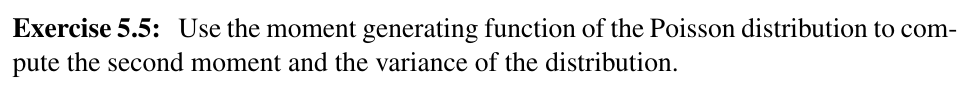

In [1]:
%display latex
var('t mu')
mgf = exp(mu*(exp(t)-1))
d0 = mgf
d1 = diff(mgf,t)
d2 = diff(d1,t)
d3 = diff(d2,t)
d4 = diff(d3,t)
map(expand, [d0,d1,d2,d3,d4])

[e^(mu*e^t - mu),
 mu*e^(mu*e^t - mu + t),
 mu^2*e^(mu*e^t - mu + 2*t) + mu*e^(mu*e^t - mu + t),
 mu^3*e^(mu*e^t - mu + 3*t) + 3*mu^2*e^(mu*e^t - mu + 2*t) + mu*e^(mu*e^t - mu + t),
 mu^4*e^(mu*e^t - mu + 4*t) + 6*mu^3*e^(mu*e^t - mu + 3*t) + 7*mu^2*e^(mu*e^t - mu + 2*t) + mu*e^(mu*e^t - mu + t)]

In [2]:
m0 = d0.subs(t=0)
m1 = d1.subs(t=0)
m2 = d2.subs(t=0)
m3 = d3.subs(t=0)
m4 = d4.subs(t=0)

map(expand, [m0,m1,m2,m3,m4])

[1, mu, mu^2 + mu, mu^3 + 3*mu^2 + mu, mu^4 + 6*mu^3 + 7*mu^2 + mu]

In [3]:
_expectation = m1
_expectation

mu

In [4]:
_variance = expand(m2 - m1^2)
_variance

mu

In [5]:
_sd = sqrt(_variance)
_sd

sqrt(mu)

In [6]:
_skewness = expand((m3 - 3*m2*m1 + 3*m1*m1^2 - m1^3) / _sd^3)
_skewness

1/sqrt(mu)

In [7]:
_kurtosis = expand((m4 - 4*m3*m1 + 6*m2*m1^2 - 4*m1*m1^3 + m1^4) / _sd^4)
_kurtosis

1/mu + 3

In [8]:
_excess_kurtosis = _kurtosis - 3
_excess_kurtosis

1/mu

## Exercise 5.7

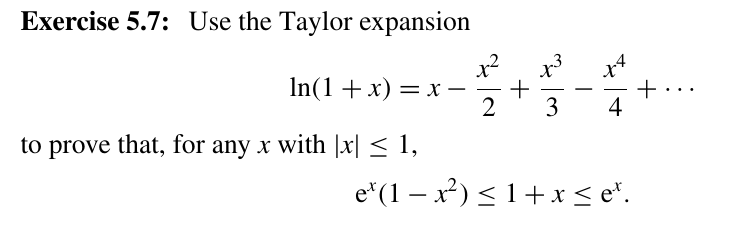

1. The Taylor expansion has radius of convergence 1.
2. The logarithm is __monotonic__ ($\ln' = x^{-1} > 0$ on $(0,\infty)$)
3. The logarithm is __concave__ ($\ln'' = -x^{-2} < 0$ on $(0,\infty)$)
4. $\ln(1+x) \leq x$ by concavity
    - equivalent to $1 + x \leq e^x$ by monotonicity
5. $e^x(1-x^2) \leq 1+x \iff e^x \leq \frac{1}{1-x} \iff x \leq -\ln(1-x)$ by assumption $1-x > 0$ and monotonicity
    - further this is equivalent to $-x \geq \ln(1-x)$, which has been established in (4)

## Exercise 5.6

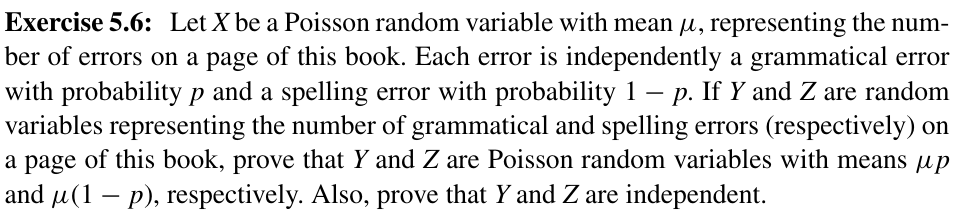

1. We enumerate the errors by $E_1,E_2,...$.
2. Let $Y_i = 1$ if $E_i$ is a grammatical error and $Y_i = 0$ otherwise.
   We therefore model $Y_i$ as a coinflip with probability $p$ of getting $1$ and probability $1-p$ of getting $0$.
3. Analogously let $Z_i = 1 - Y_i$.
4. By construction $Z = \sum_{i=1}^X Z_i$ and $Y = \sum_{i=1}^X Y_i$.
    - $\implies Y \sim \mathsf{Bin}(X,p) \ \wedge\  Z\sim \mathsf{Bin}(X,1-p)$
5. $Y \sim \mathsf{Pois}(p\mu)$:
    
    $$\mathbb{P}[Y = y] = \sum_{x=y}^\infty \mathbb{P}[Y = y|X=x] \mathbb{P}[X=x]$$
    $$= \sum_{x=y}^\infty \binom{x}{y}p^y(1-p)^{x-y} \frac{e^{-\mu} \mu^x}{x!} $$
    $$= \frac{e^{-\mu} p^y(1-p)^{-y}}{y!} \sum_{x=y}^\infty \frac{((1-p)\mu)^x}{(x-y)!} $$
    $$= \frac{e^{-\mu} p^y(1-p)^{-y}}{y!} e^{(1-p)\mu}((1-p)\mu)^y $$
    $$= \frac{e^{-p\mu} (p\mu)^y}{y!} $$
6. $Z \sim \mathsf{Pois}((1-p)\mu)$.
7. Is the following statement useful? 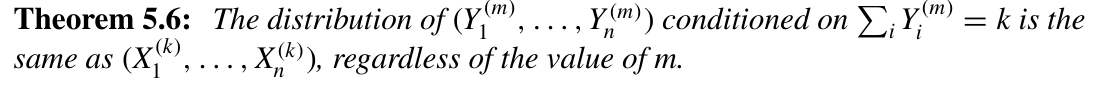

# Momente der Poissonverteilung

via fallender Faktorielle

In [9]:
%display latex
ff = lambda n: expand(product([x-i for i in range(n)]))

for n in range(5):
    print("\mu^" + str(n) + ": " + latex(ff(n)))

\mu^0: 1
\mu^1: x
\mu^2: x^{2} - x
\mu^3: x^{3} - 3 \, x^{2} + 2 \, x
\mu^4: x^{4} - 6 \, x^{3} + 11 \, x^{2} - 6 \, x


Therefore
- $E[x] = \mu$
- $E[x^2] = \mu^2 + E[x] = \mu^2 + \mu$
- $E[x^3] = \mu^3 + 3E[x^2] - 2E[x] = \mu^3 + 3\mu^2 + \mu$
- $E[x^4] = \mu^4 + 6E[x^3] - 11E[x^2] + 6E[x] = \mu^4 + 6\mu^3 + 7\mu^2 + \mu$

# Momente der Binomialverteilung

In [10]:
var('p t n mu')
assume(0 < p < 1)
mgf = (1-p+p*exp(t))^n
derivs = [diff(mgf,t)]
derivs.append(diff(derivs[-1],t))
derivs.append(diff(derivs[-1],t))
derivs.append(diff(derivs[-1],t))
moments = [d.subs(t=0) for d in derivs]
for moment in moments:
    display(moment.subs(p = mu/n))

mu

mu^2*(n - 1)/n + mu

mu^3*(n - 1)*(n - 2)/n^2 + 3*mu^2*(n - 1)/n + mu

mu^4*(n - 1)*(n - 2)*(n - 3)/n^3 + 6*mu^3*(n - 1)*(n - 2)/n^2 + 7*mu^2*(n - 1)/n + mu

## Exercise 5.14
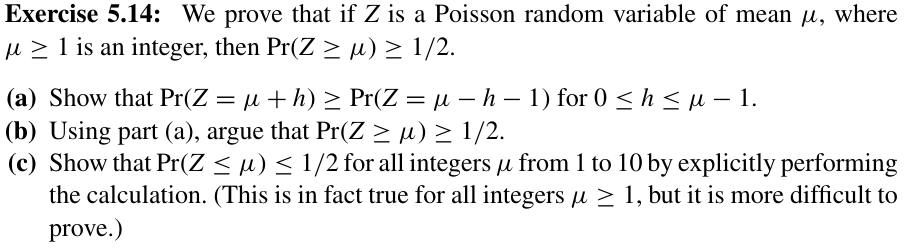

## Exercise 5.15

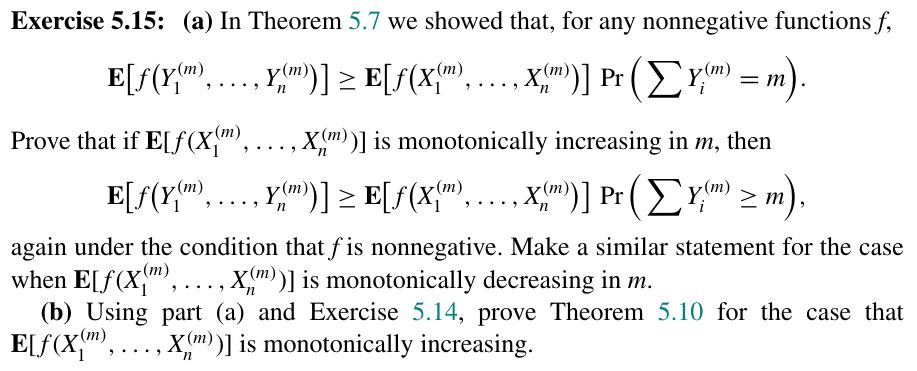

### (a)

We follow the proof of Theorem 5.7.
\begin{align}
\mathbb{E}\left[f(X^{(m)}...)\right]\mathbb{P}[\sum Y_i^{(m)} \geq m]
=& \sum_{k=m}^\infty \mathbb{E}\left[f(X^{(m)}...)\right]\mathbb{P}[\sum Y_i^{(m)} = k]
\\\leq& \sum_{k=m}^\infty \mathbb{E}\left[f(X^{(k)}...)\right]\mathbb{P}[\sum Y_i^{(m)} = k]
\quad\text{(increasing property)}
\\\leq& \sum_{k=0}^\infty \mathbb{E}\left[f(X^{(k)}...)\right]\mathbb{P}[\sum Y_i^{(m)} = k]
\quad(f \geq 0)
\\=& \sum_{k=0}^\infty \mathbb{E}\left[f(Y^{(m)}...)|\sum Y_i^{(m)} = k\right]\mathbb{P}[\sum Y_i^{(m)} = k]
\\=& \mathbb{E}\left[f(Y^{(m)}...)\right]
\end{align}

We see that the bound is much better, because we ignore fewer summands when we use the inequality.

For decreasing case the computations are nearly identical:

\begin{align}
\mathbb{E}\left[f(X^{(m)}...)\right]\mathbb{P}[\sum Y_i^{(m)} \leq m]
=& \sum_{k=0}^m \mathbb{E}\left[f(X^{(m)}...)\right]\mathbb{P}[\sum Y_i^{(m)} = k]
\\\leq& \sum_{k=0}^m \mathbb{E}\left[f(X^{(k)}...)\right]\mathbb{P}[\sum Y_i^{(m)} = k]
\quad\text{(decreasing property)}
\\\leq& \sum_{k=0}^\infty \mathbb{E}\left[f(X^{(k)}...)\right]\mathbb{P}[\sum Y_i^{(m)} = k]
\quad(f \geq 0)
\\=& \sum_{k=0}^\infty \mathbb{E}\left[f(Y^{(m)}...)|\sum Y_i^{(m)} = k\right]\mathbb{P}[\sum Y_i^{(m)} = k]
\\=& \mathbb{E}\left[f(Y^{(m)}...)\right]
\end{align}


### (b)

Is a direct corollary of part (a) and Exercise 5.14.

In [88]:
%display latex
var('x t n mu i j mu1 mu2 mu3 mu4')

forget()
assume(t>0,x>0,n>0,n,'integer', mu>0, i,'integer',j,'integer',0<i<j<=n,mu1>0,mu2>0,mu3>0,mu4>0, n>1)
assume(mu1 < mu2)

exponential = exp(-x*mu)*mu
inner = exponential.subs(mu=mu1,x=t)*exponential.subs(mu=mu2,x=x-t)
term2 = expand(integral(inner,t,0,x))
factor(term2)

mu1*mu2*(e^(mu1*x) - e^(mu2*x))*e^(-mu1*x - mu2*x)/(mu1 - mu2)

In [77]:
term3 = factor(integral(term2.subs(x=t)*exponential.subs(x=x-t,mu=mu3),t,0,x))
term3

(mu1*e^(mu1*x + mu2*x) - mu2*e^(mu1*x + mu2*x) - mu1*e^(mu1*x + mu3*x) + mu3*e^(mu1*x + mu3*x) + mu2*e^(mu2*x + mu3*x) - mu3*e^(mu2*x + mu3*x))*mu1*mu2*mu3*e^(-mu1*x - mu2*x - mu3*x)/((mu1 - mu2)*(mu1 - mu3)*(mu2 - mu3))

In [80]:
term4 = factor(integral(term3.subs(x=t)*exponential.subs(x=x-t,mu=mu4),t,0,x))
term4

(mu1^2*mu2*e^(mu1*x + mu2*x + mu3*x) - mu1*mu2^2*e^(mu1*x + mu2*x + mu3*x) - mu1^2*mu3*e^(mu1*x + mu2*x + mu3*x) + mu2^2*mu3*e^(mu1*x + mu2*x + mu3*x) + mu1*mu3^2*e^(mu1*x + mu2*x + mu3*x) - mu2*mu3^2*e^(mu1*x + mu2*x + mu3*x) - mu1^2*mu2*e^(mu1*x + mu2*x + mu4*x) + mu1*mu2^2*e^(mu1*x + mu2*x + mu4*x) + mu1^2*mu4*e^(mu1*x + mu2*x + mu4*x) - mu2^2*mu4*e^(mu1*x + mu2*x + mu4*x) - mu1*mu4^2*e^(mu1*x + mu2*x + mu4*x) + mu2*mu4^2*e^(mu1*x + mu2*x + mu4*x) + mu1^2*mu3*e^(mu1*x + mu3*x + mu4*x) - mu1*mu3^2*e^(mu1*x + mu3*x + mu4*x) - mu1^2*mu4*e^(mu1*x + mu3*x + mu4*x) + mu3^2*mu4*e^(mu1*x + mu3*x + mu4*x) + mu1*mu4^2*e^(mu1*x + mu3*x + mu4*x) - mu3*mu4^2*e^(mu1*x + mu3*x + mu4*x) - mu2^2*mu3*e^(mu2*x + mu3*x + mu4*x) + mu2*mu3^2*e^(mu2*x + mu3*x + mu4*x) + mu2^2*mu4*e^(mu2*x + mu3*x + mu4*x) - mu3^2*mu4*e^(mu2*x + mu3*x + mu4*x) - mu2*mu4^2*e^(mu2*x + mu3*x + mu4*x) + mu3*mu4^2*e^(mu2*x + mu3*x + mu4*x))*mu1*mu2*mu3*mu4*e^(-mu1*x - mu2*x - mu3*x - mu4*x)/((mu1 - mu2)*(mu1 - mu3)*(mu1 - mu4)*(mu2 - mu3)*(mu2 - mu4)*(mu3 - mu4))

In [82]:
expand((mu1 - mu2)*(mu1-mu3)*(mu2-mu3))

mu1^2*mu2 - mu1*mu2^2 - mu1^2*mu3 + mu2^2*mu3 + mu1*mu3^2 - mu2*mu3^2

In [104]:
pdf = (1-exp(-x/n))^(n-1)*exp(-x/n)
display(pdf)
forget()
assume(n,'integer', n > 1, t > 1)
integral(x*pdf,x,0,oo)

(-e^(-x/n) + 1)^(n - 1)*e^(-x/n)

integrate(x*(-e^(-x/n) + 1)^(n - 1)*e^(-x/n), x, 0, +Infinity)